Đã áp dụng bộ lọc Bandpass (giữ lại 100Hz - 8000Hz).
Sample Rate (fs): 22050 Hz


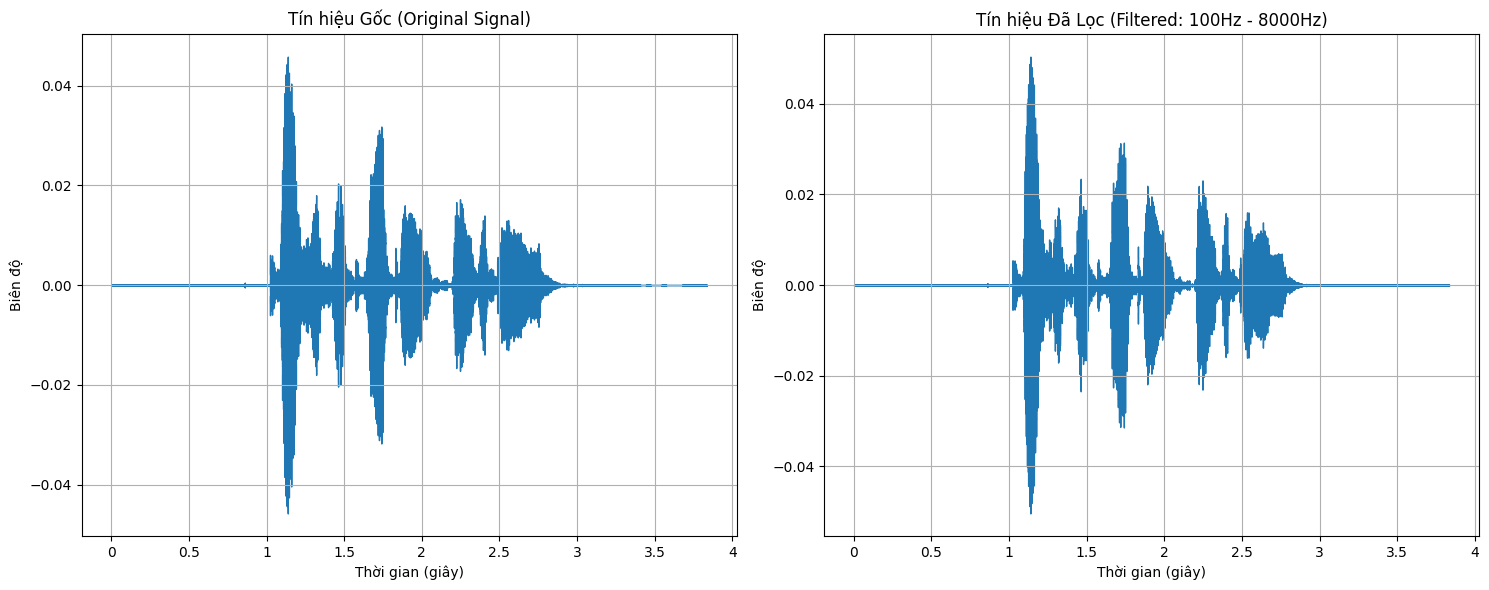

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter

# --- 1. Hàm thiết kế bộ lọc Bandpass Butterworth ---
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    """
    Thiết kế và áp dụng bộ lọc bandpass Butterworth.
    fs: Tần số lấy mẫu (Hz)
    lowcut: Tần số cắt dưới (Hz)
    highcut: Tần số cắt trên (Hz)
    """
    nyq = 0.5 * fs  # Tần số Nyquist
    low = lowcut / nyq
    high = highcut / nyq
    
    # b, a là các hệ số của bộ lọc IIR
    b, a = butter(order, [low, high], btype='band')
    
    # Áp dụng bộ lọc cho dữ liệu
    y_filtered = lfilter(b, a, data)
    return y_filtered

# --- 2. Tải file âm thanh mẫu ---
file_path = "../data/raw/Actor_01/03-01-04-01-01-01-01.wav" # File "Buồn"
y, sr = librosa.load(file_path, sr=22050) # sr = 22050 Hz

# --- 3. Áp dụng bộ lọc ---
# Giữ lại dải tần số giọng nói (100Hz đến 8000Hz)
LOW_CUT = 100
HIGH_CUT = 8000

y_filtered = butter_bandpass_filter(y, LOW_CUT, HIGH_CUT, sr)

print(f"Đã áp dụng bộ lọc Bandpass (giữ lại {LOW_CUT}Hz - {HIGH_CUT}Hz).")
print(f"Sample Rate (fs): {sr} Hz")

# --- 4. Trực quan hóa để so sánh ---
plt.figure(figsize=(15, 6))

# Plot 1: Tín hiệu Gốc
plt.subplot(1, 2, 1) # 1 hàng, 2 cột, plot thứ 1
librosa.display.waveshow(y, sr=sr)
plt.title('Tín hiệu Gốc (Original Signal)')
plt.xlabel('Thời gian (giây)')
plt.ylabel('Biên độ')
plt.grid(True)

# Plot 2: Tín hiệu Đã Lọc
plt.subplot(1, 2, 2) # 1 hàng, 2 cột, plot thứ 2
librosa.display.waveshow(y_filtered, sr=sr)
plt.title(f'Tín hiệu Đã Lọc (Filtered: {LOW_CUT}Hz - {HIGH_CUT}Hz)')
plt.xlabel('Thời gian (giây)')
plt.ylabel('Biên độ')
plt.grid(True)

plt.tight_layout()
plt.show()